In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# import 3D plot lib
from mpl_toolkits import mplot3d
import ipywidgets as widgets

In [3]:
# Import data from CVS File 

file = pd.read_csv('UnitMain_9.csv')
file.head()

,Date,Time,Latitude,Longitude,Altitude,Speed,Heading,Signal Quality,Number of Satalites Connected,X-Axis Acceleration,Y-Axis Acceleration,Z-Axis Acceleration
0,12/4/2022,7:20:20,-33.89134,18.95951,235.9,1.09,37.18,2,9,0.194,-0.022,1.008
1,12/4/2022,7:20:22,-33.89134,18.95952,235.9,1.09,36.87,2,9,0.154,-0.032,1.010
2,12/4/2022,7:20:24,-33.89134,18.95952,235.9,0.41,36.87,2,9,0.134,0.064,1.004
3,12/4/2022,7:20:25,-33.89134,18.95952,235.9,0.33,36.87,2,9,0.068,0.096,1.024
4,12/4/2022,7:20:27,-33.89134,18.95952,235.9,0.31,36.87,2,9,0.072,0.114,1.020


In [27]:
# Arrays of interest 

timeArray = file['Time']
altitudeArray = file['Altitude']
longitudeArray = file['Longitude']
latitudeArray = file['Latitude']
speedArray = file['Speed']
xAccelarationArray = file['X-Axis Acceleration']
yAccelarationArray = file['Y-Axis Acceleration']
zAccelarationArray = file['Z-Axis Acceleration']
arraySize = timeArray.size

In [20]:
# Plotting the Path Travelled 

def getPathTravelled():
    fig = plt.figure(figsize =(10, 15))
    ax = plt.axes(projection = '3d')
        
    x = longitudeArray
    y = latitudeArray
    z = altitudeArray
    
    ax.plot3D(x,y,z)
    plt.show()
    
def getRoadAltitude(): 
    plt.plot(timeArray, altitudeArray)
    plt.show()

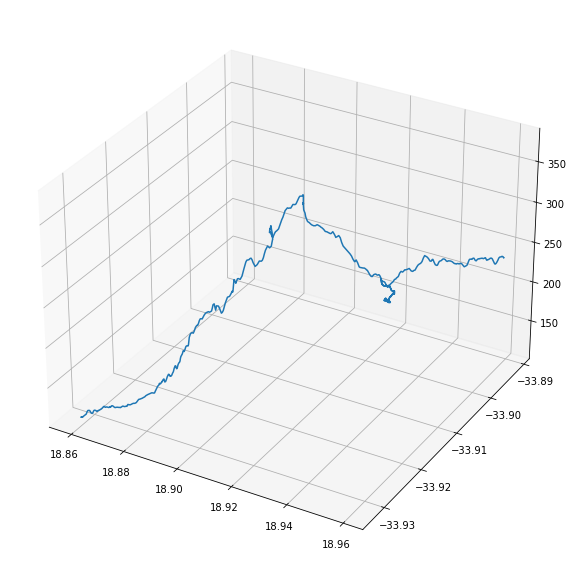

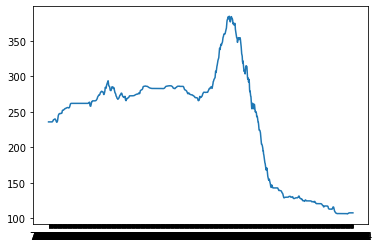

In [23]:
getPathTravelled()
SgetRoadAltitude()

In [65]:
# Calculating the work done by the environmetal forces 

In [43]:
# µ: Tire-road surface rolling friction coefficient;
# W: Vehicle weight [kg];
# g: Gravitational acceleration [=9.8 m/s2];

ROLLING_RESISTANCE = 0.02
VEHICLE_WEIGHT = 3100
GRAVITY = 9.81

def getFrictionWork():
    
    # Rfriction = µ*W*g
    R_Friction = ROLLING_RESISTANCE*VEHICLE_WEIGHT*GRAVITY
    return R_Friction
    

In [66]:
def get3DElavationAngle(latitudeArray, longitudeArray,altitudeArray):
    
    elavationAngle_3d = []
    rangesize = altitudeArray.size - 1
    
    for i in range (rangesize):
       
        x = longitudeArray[i]
        y = latitudeArray[i]
        z = altitudeArray[i]
        
        dist_3d = np.sqrt(x**2 + y**2 + z**2)
        changeInHeight = altitudeArray[i + 1] - altitudeArray[i]
        angle = np.arcsin(changeInHeight/dist_3d)
        elavationAngle_3d.append(angle)
        
    return elavationAngle_3d



In [67]:
def getSlopeDragWork(elavationAngleArray, arraySize):
    
    slopDragWorkArray = []
    
    for i in range(arraySize):
        elavationAngle = elavationAngleArray[i]
        slopeDrag = VEHICLE_WEIGHT*GRAVITY*np.sin(elavationAngle)
        slopDragWorkArray.append(slopeDrag)
       
    return slopDragWorkArray

In [57]:
# CD: Drag coefficient;
# ρ: Air density [kg/m3];
# A: Vehicle frontal area [m2];
# v: Vehicle speed [m/s];    

DRAG_COEFF = 0.36
AIR_DENSITY = 1.184 
VEHICLE_FRONT_A = 4
    
def getAerodynamicWork(speedArray):
    
    arrLength = speedArray.size -1
    print('array size: ', arrLength)
    aerodynamicWorkArry = []
    
    for i in range(arrLength):
      
        R_Aerodynamic = 0.5*DRAG_COEFF*AIR_DENSITY*VEHICLE_FRONT_A*speedArray[i]**2
        aerodynamicWorkArry.append(R_Aerodynamic)
        
    return aerodynamicWorkArry

In [68]:
def getInertiaWork():
    
    accelarationArray = [] 
    inertiaWorkArray = []
    
    # Calculating the 3d accelaration value    
    for i in range (arraySize):
       
        x = xAccelarationArray[i]
        y = yAccelarationArray[i]
        z = zAccelarationArray[i]
        
        acc_3d = np.sqrt(x**2 + y**2 + z**2)
        accelarationArray.append(acc_3d)
        
   # Calculating Inertia 
    for i in range(arraySize):
        
        acc = accelarationArray[i]
        inertiaWork = VEHICLE_WEIGHT*acc
        inertiaWorkArray.append(inertiaWork)

    
    return inertiaWorkArray
  



In [69]:
elavationAngleArray =  get3DElavationAngle(latitudeArray, longitudeArray,altitudeArray)
arraySize = timeArray.size -1
slopDragWorkArray = getSlopeDragWork(elavationAngleArray, arraySize)


In [70]:
slopDragWorkArray.append(1)
slopDragWorkArray = pd.DataFrame(slopDragWorkArray)
slopDragWorkArray = slopDragWorkArray[0]

In [52]:
frictionWorkDone = getFrictionWork()

In [53]:
inertiaWorkArray = getInertiaWork()
inertiaWorkArray.append(1)
inertiaWorkArray = pd.DataFrame(inertiaWorkArray)
inertiaWorkArray= inertiaWorkArray[0]

In [60]:
aerodynamicWorkArray = getAerodynamicWork(speedArray)
aerodynamicWorkArray.append(1)
aerodynamicWorkArray = pd.DataFrame(aerodynamicWorkArray)
aerodynamicWorkArray = aerodynamicWorkArray[0]

array size:  1155


In [62]:
def getTotalEnvironmentalWorkDoneOnTheCar():
    
    totalWOrkDoneArray = []
    
    for i in range (arraySize):
        
        totalWork = inertiaWorkArray[i] + slopDragWorkArray[i] + aerodynamicWorkArray[i] + frictionWorkDone
        totalWOrkDoneArray.append(totalWork)
    
    return totalWOrkDoneArray

In [63]:

totalWOrkDoneArray = getTotalEnvironmentalWorkDoneOnTheCar()
totalWOrkDoneArray.append(1)
totalWOrkDoneArray = pd.DataFrame(totalWOrkDoneArray)
totalWOrkDoneArray= totalWOrkDoneArray[0]
